# Logistic Regression

- data taken from: https://www.kaggle.com/datasets/johndddddd/customer-satisfaction

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving passenger_satisfaction.csv to passenger_satisfaction (2).csv
User uploaded file "passenger_satisfaction (2).csv" with length 176240 bytes


In [ ]:
import pandas as pd

# Load the data from the CSV file
file_path = 'passenger_satisfaction.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,id,gender,age,flight_distance,wifi_quality,seat_comfort,leg_room,cleanliness,departure_delay,arrival_delay,passenger_satisfied
0,70172,Male,13,460,3,5,3,5,25,18.0,0
1,5047,Male,25,235,3,1,5,1,1,6.0,0
2,110028,Female,26,1142,2,5,3,5,0,0.0,1
3,24026,Female,25,562,2,2,5,2,11,9.0,0
4,119299,Male,61,214,3,5,4,3,0,0.0,1


- convert gender to numeric
- drop id column

In [ ]:
# Recode the 'gender' variable
df['gender'] = df['gender'].map({'Male':0 , 'Female': 1})
variables = df.columns.drop('id')  # Exclude 'id' from the variables list
df

,id,gender,age,flight_distance,wifi_quality,seat_comfort,leg_room,cleanliness,departure_delay,arrival_delay,passenger_satisfied
0,70172,0,13,460,3,5,3,5,25,18.0,0
1,5047,0,25,235,3,1,5,1,1,6.0,0
2,110028,1,26,1142,2,5,3,5,0,0.0,1
3,24026,1,25,562,2,2,5,2,11,9.0,0
4,119299,0,61,214,3,5,4,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,88948,1,33,1340,2,5,4,3,0,0.0,1
4996,102542,1,54,223,1,5,1,5,37,28.0,0
4997,31577,1,23,602,2,2,5,2,0,0.0,0
4998,19212,0,40,459,4,2,4,2,0,0.0,1


# EDA
- Histograms
- Correlation plots

In [ ]:
df.describe()

,id,gender,age,flight_distance,wifi_quality,seat_comfort,leg_room,cleanliness,departure_delay,arrival_delay,passenger_satisfied
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4987.000000,5000.000000
mean,64864.987400,0.510200,39.129600,1205.369600,2.741200,3.421000,3.338200,3.268400,15.06280,15.489874,0.435000
std,37366.695946,0.499946,15.181545,1004.325969,1.328223,1.324277,1.313075,1.318601,36.19017,36.787260,0.495807
min,8.000000,0.000000,7.000000,67.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000
25%,32376.250000,0.000000,27.000000,409.750000,2.000000,2.000000,2.000000,2.000000,0.00000,0.000000,0.000000
50%,64824.500000,1.000000,39.000000,861.000000,3.000000,4.000000,4.000000,3.000000,0.00000,0.000000,0.000000
75%,97511.500000,1.000000,51.000000,1771.500000,4.000000,4.250000,4.000000,4.000000,14.00000,14.000000,1.000000
max,129860.000000,1.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,480.00000,471.000000,1.000000


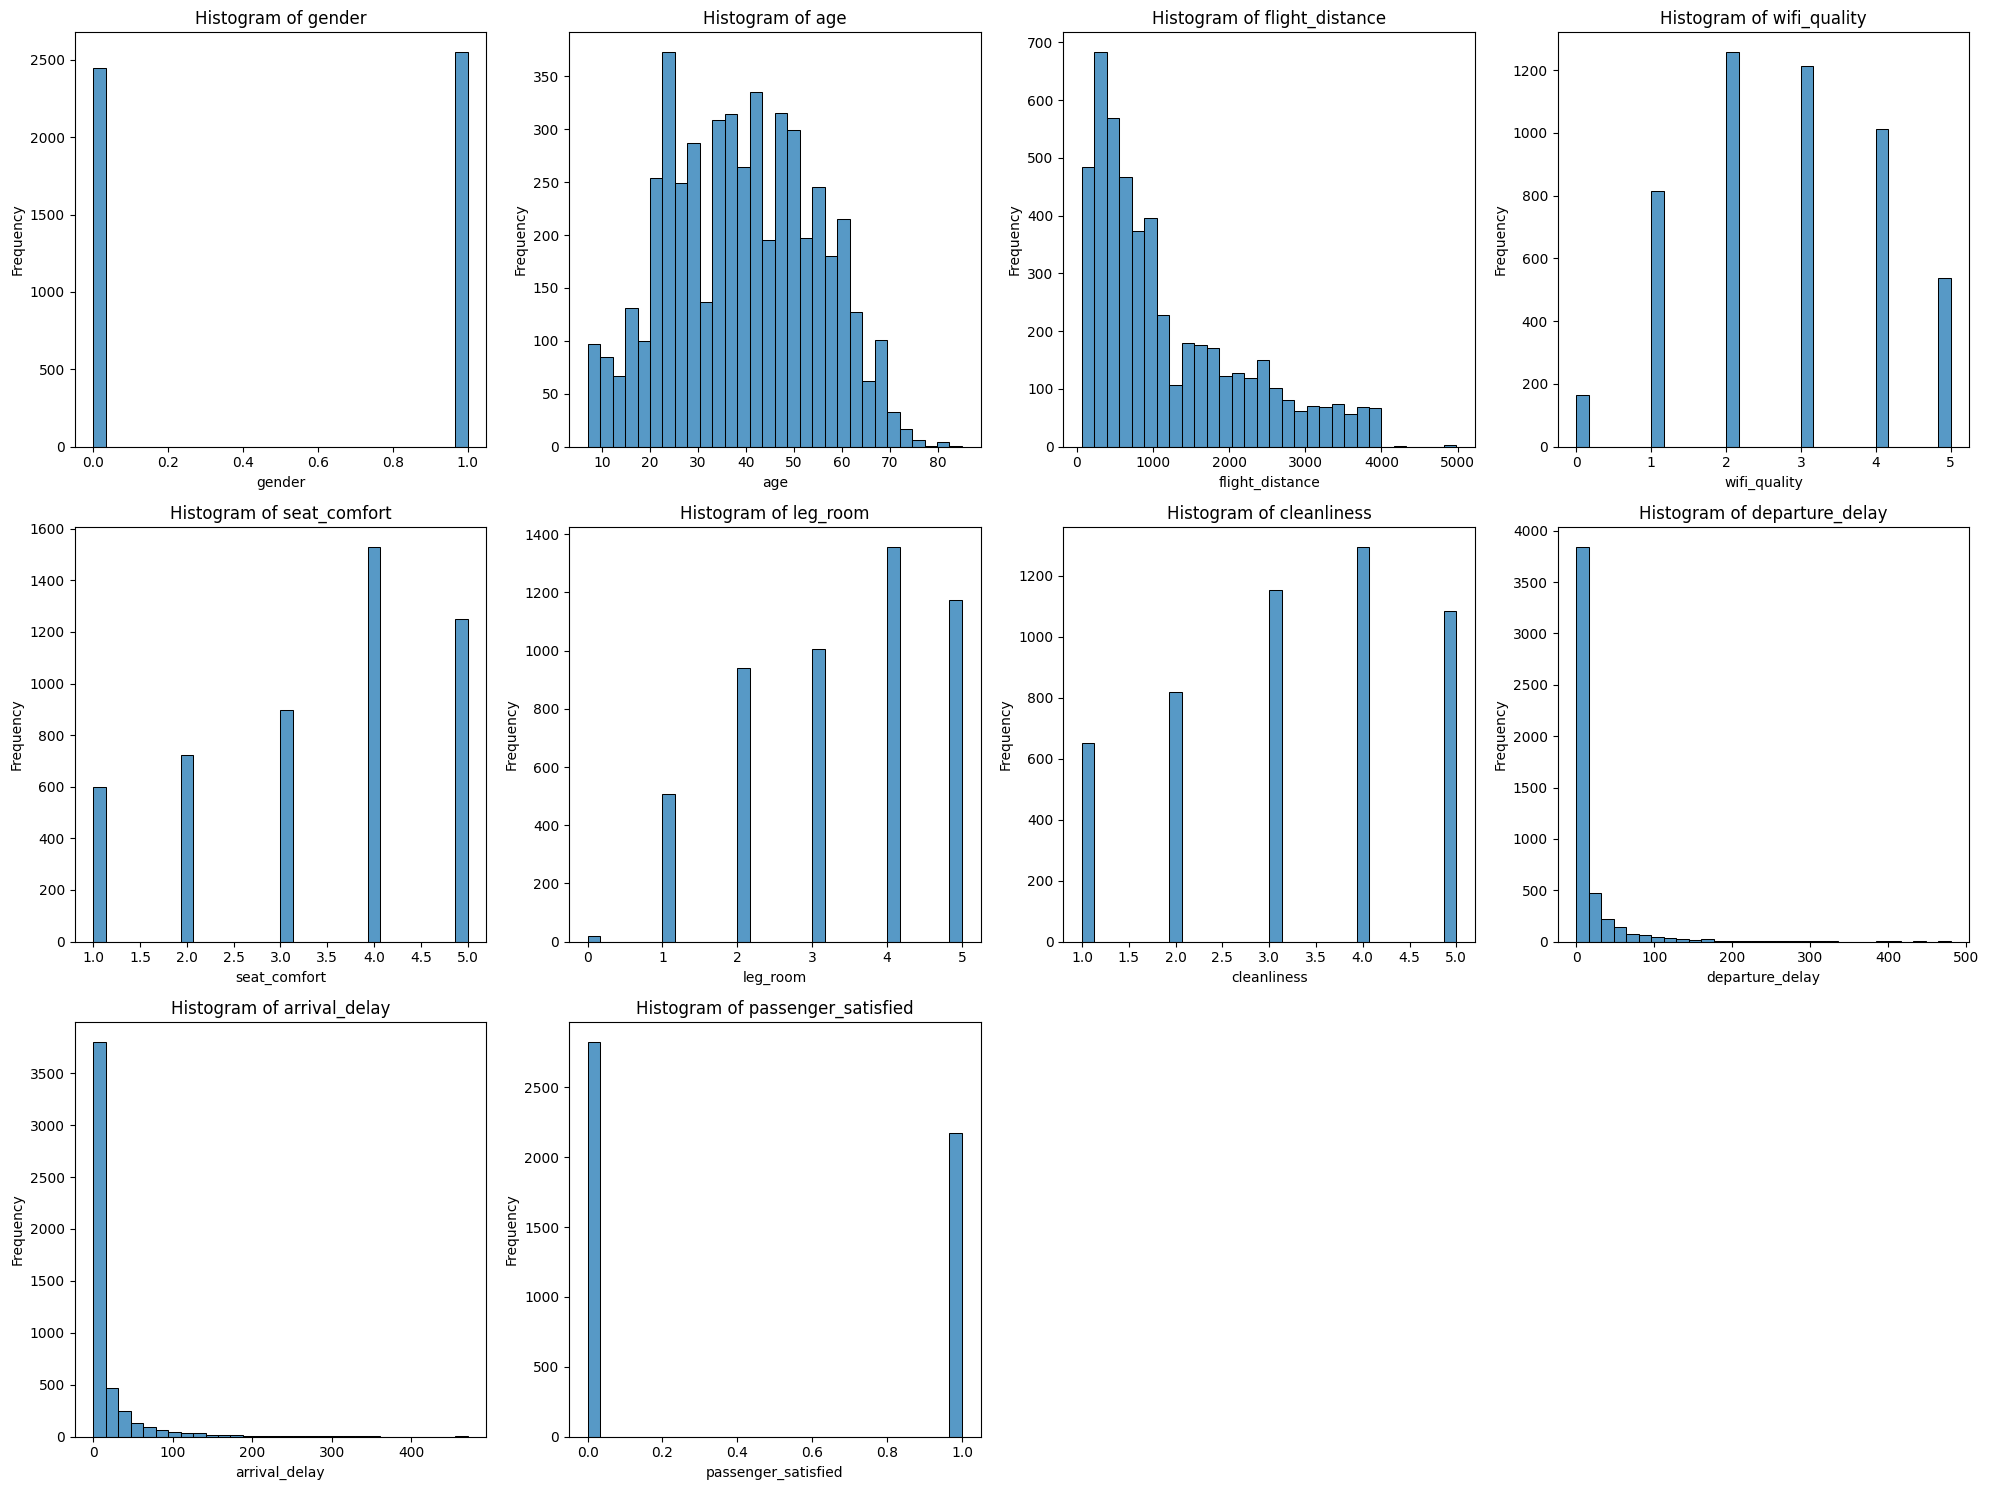

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for each variable

plt.figure(figsize=(20, 15))
for i, var in enumerate(variables):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[var], kde=False, bins=30)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


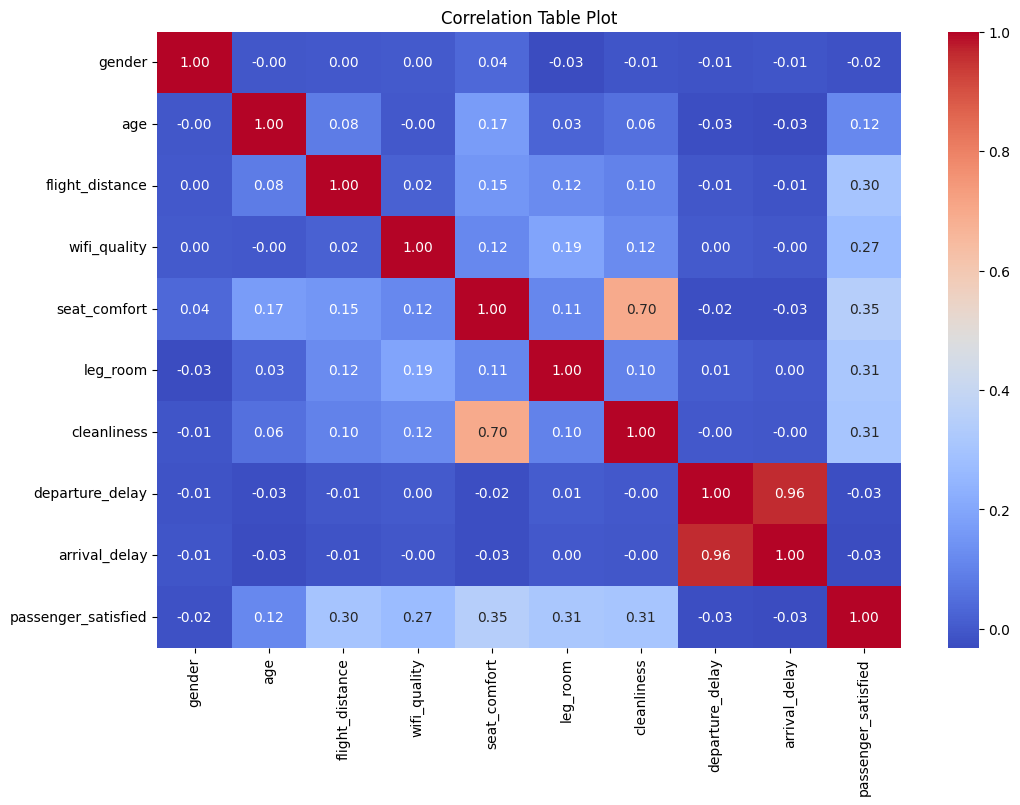

In [ ]:
# Generate correlation table plot
corr_matrix = df[variables].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Table Plot')
plt.show()


# Logit with all variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into training and test sets (80% training, 20% testing)
X = df.drop(['id', 'passenger_satisfied'], axis=1)
y = df['passenger_satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Test Accuracy:',accuracy)
print('')
# For explanations of what precision/recall/f1 scores are
# https://www.v7labs.com/blog/f1-score-guide#:~:text=F1%20score%20is%20a%20machine%20learning%20evaluation%20metric%20that%20measures,prediction%20across%20the%20entire%20dataset.
print(classification_rep)

Test Accuracy: 0.654308617234469

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       554
           1       0.61      0.60      0.61       444

    accuracy                           0.65       998
   macro avg       0.65      0.65      0.65       998
weighted avg       0.65      0.65      0.65       998



In [ ]:
# Retrieve the coefficients from the logistic regression model
coefficients = logistic_model.coef_[0]
feature_names = X.columns

# Create a DataFrame to display the feature names and corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coefficients_df

,Feature,Coefficient
0,gender,-1.110375
1,age,-0.012318
2,flight_distance,0.000479
3,wifi_quality,0.129023
4,seat_comfort,0.518273
5,leg_room,0.246235
6,cleanliness,-0.089682
7,departure_delay,0.002379
8,arrival_delay,-0.006225


# Logit, with one variable each

In [ ]:
# Initialize an empty DataFrame to store the variable names and their corresponding accuracies
one_var_df = pd.DataFrame(columns=['Variable', 'Accuracy'])

# Loop over each variable to fit a one-variable logistic regression model
for var in X.columns:
    X_one_var = df[[var]]

    # Split the data into training and test sets
    X_train_one_var, X_test_one_var, y_train_one_var, y_test_one_var = train_test_split(X_one_var, y, test_size=0.2, random_state=42)

    # Create and train the logistic regression model
    logistic_model_one_var = LogisticRegression()
    logistic_model_one_var.fit(X_train_one_var, y_train_one_var)

    # Make predictions and evaluate accuracy
    y_pred_one_var = logistic_model_one_var.predict(X_test_one_var)
    accuracy_one_var = accuracy_score(y_test_one_var, y_pred_one_var)

    # Append the variable and its accuracy to the DataFrame
    one_var_df = one_var_df.append({'Variable': var, 'Accuracy': accuracy_one_var}, ignore_index=True)


<ipython-input-36-07c4dc093cf0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  one_var_df = one_var_df.append({'Variable': var, 'Accuracy': accuracy_one_var}, ignore_index=True)
<ipython-input-36-07c4dc093cf0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  one_var_df = one_var_df.append({'Variable': var, 'Accuracy': accuracy_one_var}, ignore_index=True)
<ipython-input-36-07c4dc093cf0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  one_var_df = one_var_df.append({'Variable': var, 'Accuracy': accuracy_one_var}, ignore_index=True)
<ipython-input-36-07c4dc093cf0>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  one_var_df = one_va

In [ ]:
one_var_df


,Variable,Accuracy
0,gender,0.555110
1,age,0.523046
2,flight_distance,0.641283
3,wifi_quality,0.683367
4,seat_comfort,0.658317
5,leg_room,0.637275
6,cleanliness,0.612224
7,departure_delay,0.555110
8,arrival_delay,0.555110


- The variable `wifi_quality` yielded the highest accuracy of approximately \(0.6834\)
- followed by `seat_comfort` and `flight_distance` with accuracies of \(0.6583\) and \(0.6413\), respectively.
- On the other hand, `age` was the least predictive with an accuracy of \(0.5230\).


# Forward Selection

In [ ]:
# Initialize a logistic regression model
logistic_model_forward = LogisticRegression()

# Perform forward selection using SequentialFeatureSelector
forward_selector = SequentialFeatureSelector(logistic_model_forward, direction='forward', n_features_to_select=None)
forward_selector.fit(X_train, y_train)

# Initialize an empty DataFrame to store the selected variables and their corresponding accuracies
forward_selection_df = pd.DataFrame(columns=['Selected_Variables', 'Accuracy'])

# Loop through the selected features to evaluate the model at each step
selected_features = []
for i, selected in enumerate(forward_selector.get_support()):
    if selected:
        selected_features.append(X.columns[i])
        # Train the model on the selected features
        logistic_model_forward.fit(X_train[selected_features], y_train)

        # Make predictions and evaluate accuracy
        y_pred_forward = logistic_model_forward.predict(X_test[selected_features])
        accuracy_forward = accuracy_score(y_test, y_pred_forward)

        # Append the selected variables and their accuracy to the DataFrame
        forward_selection_df = forward_selection_df.append({'Selected_Variables': ', '.join(selected_features), 'Accuracy': accuracy_forward}, ignore_index=True)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-38-b6c3f690d60c>:24: FutureWarning: The frame.append method is depre

In [ ]:
forward_selection_df

,Selected_Variables,Accuracy
0,flight_distance,0.641283
1,"flight_distance, wifi_quality",0.687375
2,"flight_distance, wifi_quality, seat_comfort",0.703407
3,"flight_distance, wifi_quality, seat_comfort, l...",0.717435


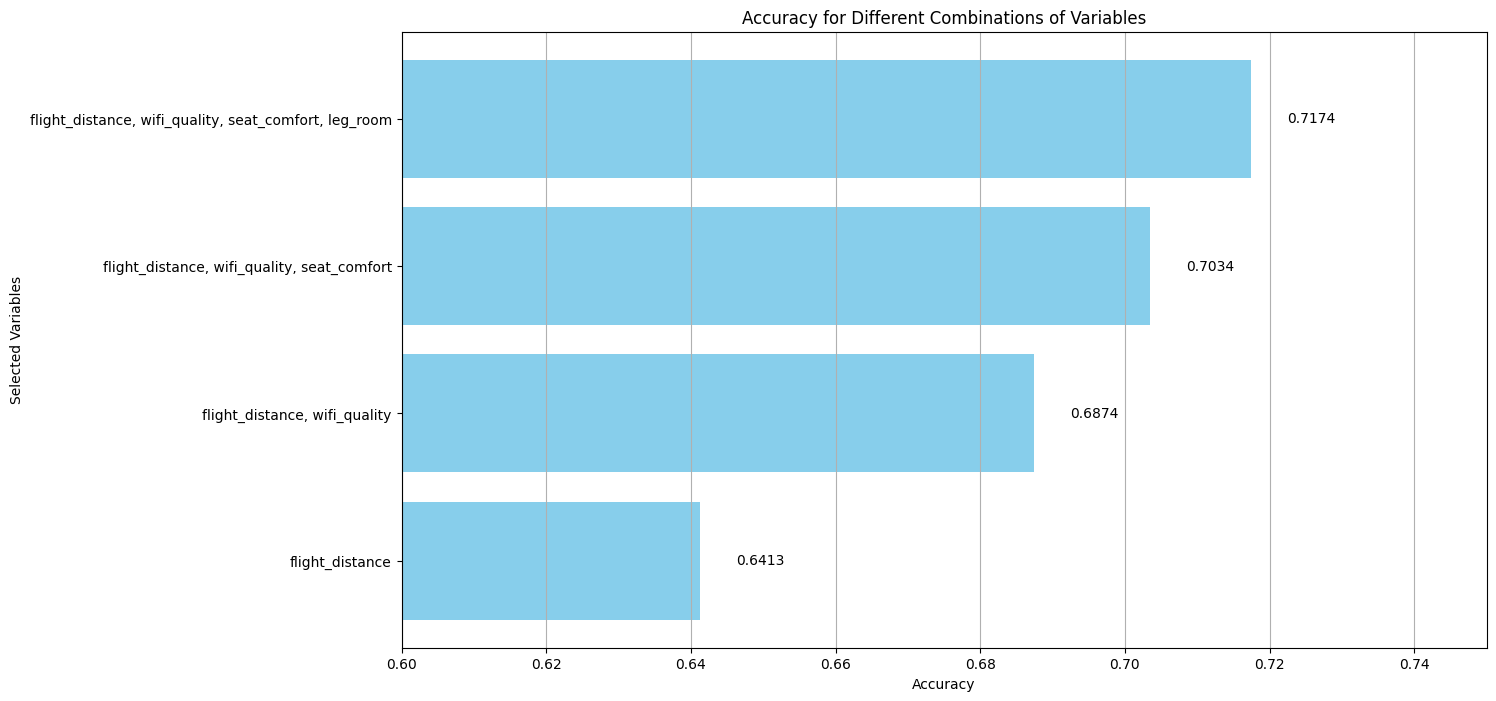

In [ ]:
# Plotting
plt.figure(figsize=(14, 8))
plt.barh(forward_selection_df['Selected_Variables'], forward_selection_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Selected Variables')
plt.title('Accuracy for Different Combinations of Variables')
plt.xlim(.6, .75)
plt.grid(True, axis='x')

# Annotate the bars with the actual accuracy values
for i, v in enumerate(forward_selection_df['Accuracy']):
    plt.text(v + 0.005, i, str(round(v, 4)), va='center', color='black')

plt.show()


- As variables are incrementally added to the model, the accuracy generally improves.
- Starting with `flight_distance`, the model's accuracy is \(0.6413\).
- Upon adding `wifi_quality`, the accuracy increases to \(0.6874\).
- Further addition of `seat_comfort` and `leg_room` elevates the accuracy to \(0.7034\) and \(0.7174\), respectively.

# Backward Selection

In [ ]:
# Initialize a logistic regression model for backward selection
logistic_model_backward = LogisticRegression()

# Perform backward selection using SequentialFeatureSelector
backward_selector = SequentialFeatureSelector(logistic_model_backward, direction='backward', n_features_to_select=None)
backward_selector.fit(X_train, y_train)

# Initialize an empty DataFrame to store the selected variables and their corresponding accuracies
backward_selection_df = pd.DataFrame(columns=['Selected_Variables', 'Accuracy'])

# Loop through the selected features to evaluate the model at each step
selected_features = list(X.columns)
for i, selected in enumerate(backward_selector.get_support()):
    if not selected:
        selected_features.remove(X.columns[i])
    # Train the model on the selected features
    logistic_model_backward.fit(X_train[selected_features], y_train)

    # Make predictions and evaluate accuracy
    y_pred_backward = logistic_model_backward.predict(X_test[selected_features])
    accuracy_backward = accuracy_score(y_test, y_pred_backward)

    # Append the selected variables and their accuracy to the DataFrame
    backward_selection_df = backward_selection_df.append({'Selected_Variables': ', '.join(selected_features), 'Accuracy': accuracy_backward}, ignore_index=True)


In [ ]:
backward_selection_df

,Selected_Variables,Accuracy
0,"gender, age, flight_distance, wifi_quality, se...",0.654309
1,"gender, flight_distance, wifi_quality, seat_co...",0.674349
2,"gender, wifi_quality, seat_comfort, leg_room, ...",0.695391
3,"gender, wifi_quality, seat_comfort, leg_room, ...",0.695391
4,"gender, wifi_quality, seat_comfort, leg_room, ...",0.695391
5,"gender, wifi_quality, seat_comfort, leg_room, ...",0.695391
6,"gender, wifi_quality, seat_comfort, leg_room, ...",0.708417
7,"gender, wifi_quality, seat_comfort, leg_room, ...",0.710421
8,"gender, wifi_quality, seat_comfort, leg_room",0.711423


- highest accuracy of \(0.7114\) is achieved with the model containing only the variables `gender`, `wifi_quality`, `seat_comfort`, and `leg_room`.

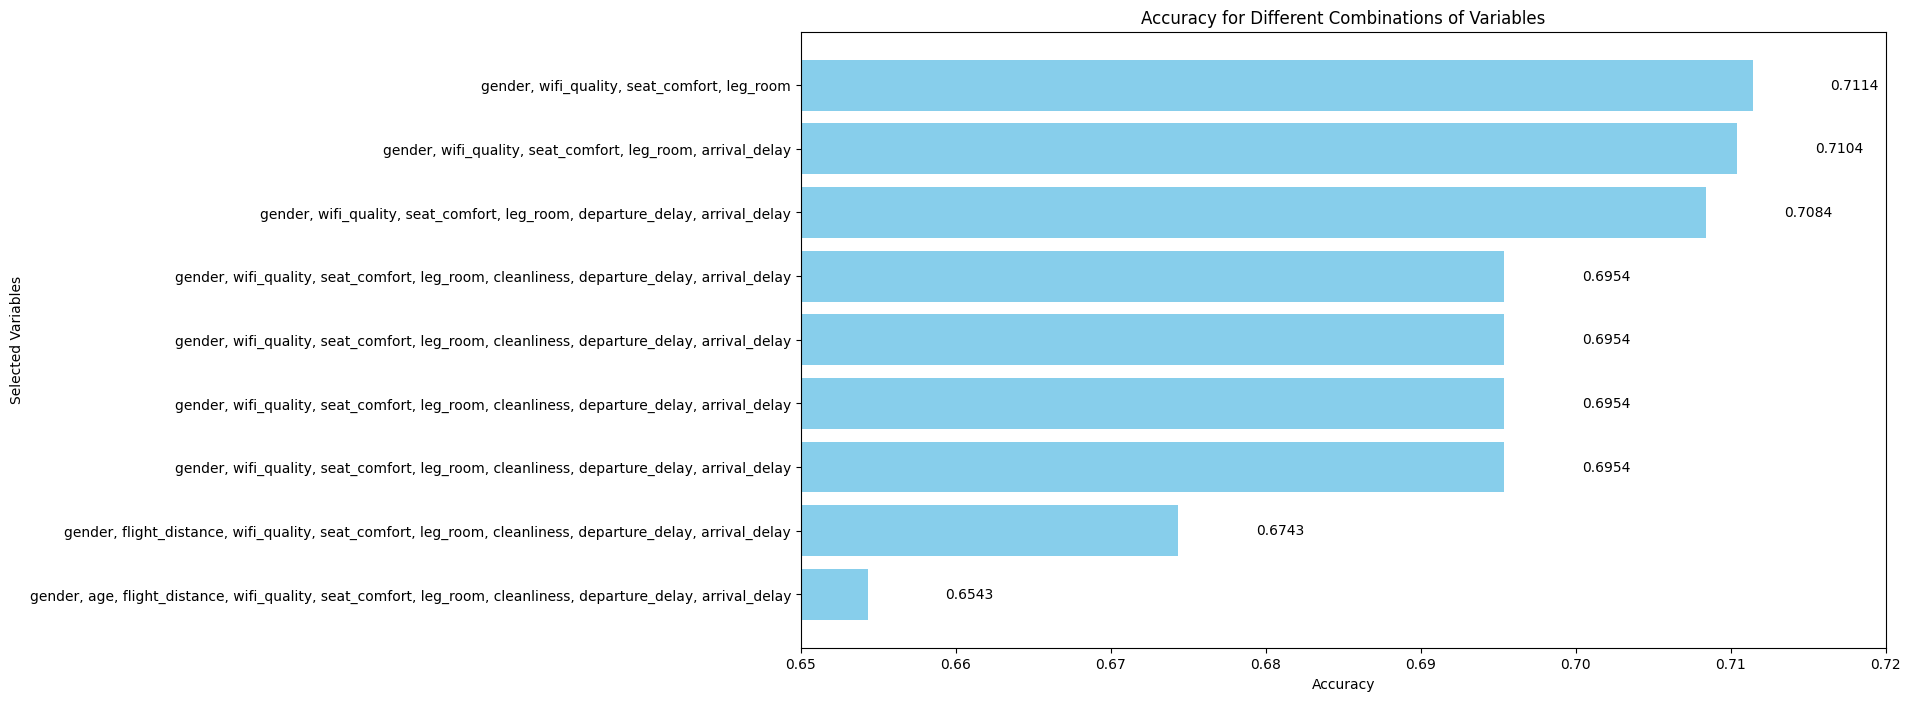

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(14, 8))
plt.barh(backward_selection_df.index, backward_selection_df['Accuracy'], color='skyblue')
plt.yticks(backward_selection_df.index, backward_selection_df['Selected_Variables'])
plt.xlabel('Accuracy')
plt.ylabel('Selected Variables')

plt.title('Accuracy for Different Combinations of Variables')
plt.xlim(.65, .72)

for i, v in enumerate(backward_selection_df['Accuracy']):
    plt.text(v + 0.005, i, str(round(v, 4)), va='center', color='black')

plt.show()


# Results
- again, we see that including all variables is not the way to highest accuracy
- incrementally adding/removing (forward/backward) variables can guide us to finding the best model